# Download Internet Performance Data For CIS countries

In [2]:
import numpy as np 
import pandas as pd 
import requests
from bs4 import BeautifulSoup
import time
import requests
import re
import json
import matplotlib.pyplot as plt
import pickle
from IPython.display import display, Markdown

In [3]:

def fetch_data(country):
    # URL for the Azerbaijan document
    url = rf'https://www.speedtest.net/global-index/{country}'
    # print(url)
    # Fetch the document
    response = requests.get(url)

    # Regular expression to find the line with the dictionary
    pattern = r'var data = (\{.*?\});'

    # Search for the pattern in the HTML content
    match = re.search(pattern, response.text, re.DOTALL)

    if match:
        # Extract the JSON-like string
        json_str = match.group(1)
        
        # Parse the JSON string into a Python dictionary
        data = json.loads(json_str)
        
        # Now 'data' is a Python dictionary containing all the information
        # data = json.dumps(data, indent=2)
        # print(f"Data for {country}")
        return data
    else:
        print("Dictionary not found in the HTML content.")
    # Check if the request was successful
    if response.status_code == 200:
        # Save the content to a file
        with open('azerbaijan_data.html', 'w', encoding='utf-8') as file:
            file.write(response.text)
        print('Document fetched successfully.')
    else:
        print('Failed to fetch the document. Status code:', response.status_code)


In [4]:
cis_countries = [
    'armenia',
    'azerbaijan',
    'belarus',
    'kazakhstan',
    'kyrgyzstan',
    'moldova',
    'russia',
    'tajikistan',
    'uzbekistan'
]

cis_data = {}
for country in cis_countries:
    cis_data[country] = fetch_data(country)

with open("cis_data", "ab") as file:
    pickle.dump(cis_data, file)

In [5]:
with open("cis_data_old", "rb") as f:
    cis_data = pickle.load(f)
with open("cis_data", "rb") as f:
    cis_data_new = pickle.load(f)

In [6]:
def merge_cis_data(new_data, old_data):
    merged_data = {}

    # Process all countries in the new data
    for country, new_country_data in new_data.items():
        merged_data[country] = new_country_data.copy()
        
        if country in old_data:
            old_country_data = old_data[country]
            
            for metric in ['fixedMean', 'mobileMean', 'fixedMedian', 'mobileMedian']:
                new_dates = set(item['date'] for item in new_country_data[metric])
                
                # Add older data points that don't exist in the newer data
                for old_item in old_country_data[metric]:
                    if old_item['date'] not in new_dates:
                        merged_data[country][metric].append(old_item)
                
                # Sort the merged data by date
                merged_data[country][metric].sort(key=lambda x: x['date'])

    # Add countries that only exist in the old data
    for country, old_country_data in old_data.items():
        if country not in merged_data:
            merged_data[country] = old_country_data

    return merged_data

# Usage
merged_cis_data = merge_cis_data(cis_data, cis_data_new)
data = merged_cis_data

In [8]:
pd.DataFrame(data['Azerbaijan']['mobileMean']).to_csv('mobile_data.csv')

# Visualization of Time Series of Internet Performance Indicators for CIS countries

## Armenia

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


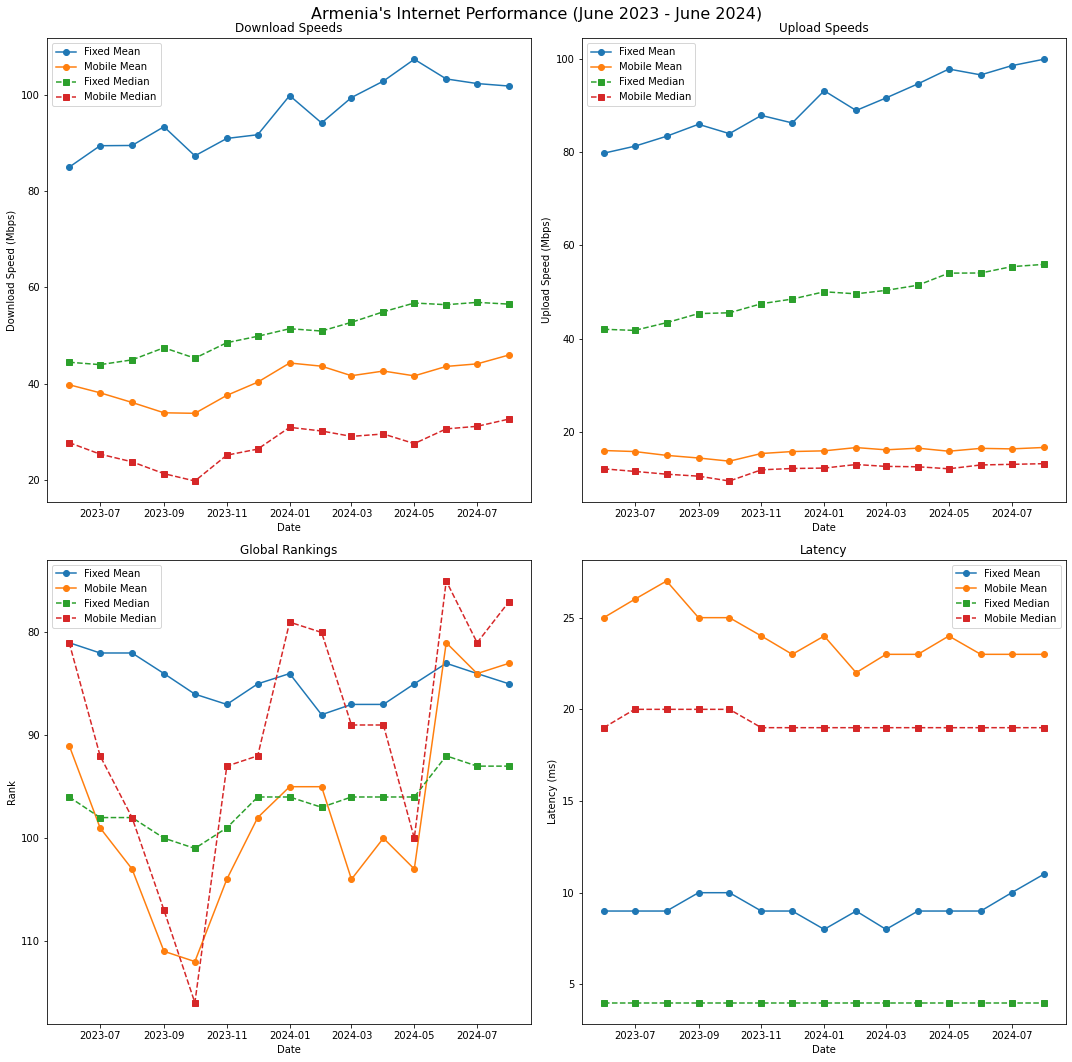


Fixed Mean Broadband Improvements:
Download Speed: 19.81%
Upload Speed: 25.22%
Rank Improvement: -4 positions
Latency Improvement: -22.22%

Mobile Mean Broadband Improvements:
Download Speed: 15.56%
Upload Speed: 4.04%
Rank Improvement: 8 positions
Latency Improvement: 8.00%

Fixed Median Broadband Improvements:
Download Speed: 27.14%
Upload Speed: 33.04%
Rank Improvement: 3 positions
Latency Improvement: 0.00%

Mobile Median Broadband Improvements:
Download Speed: 17.64%
Upload Speed: 9.05%
Rank Improvement: 4 positions
Latency Improvement: 0.00%


## Azerbaijan

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


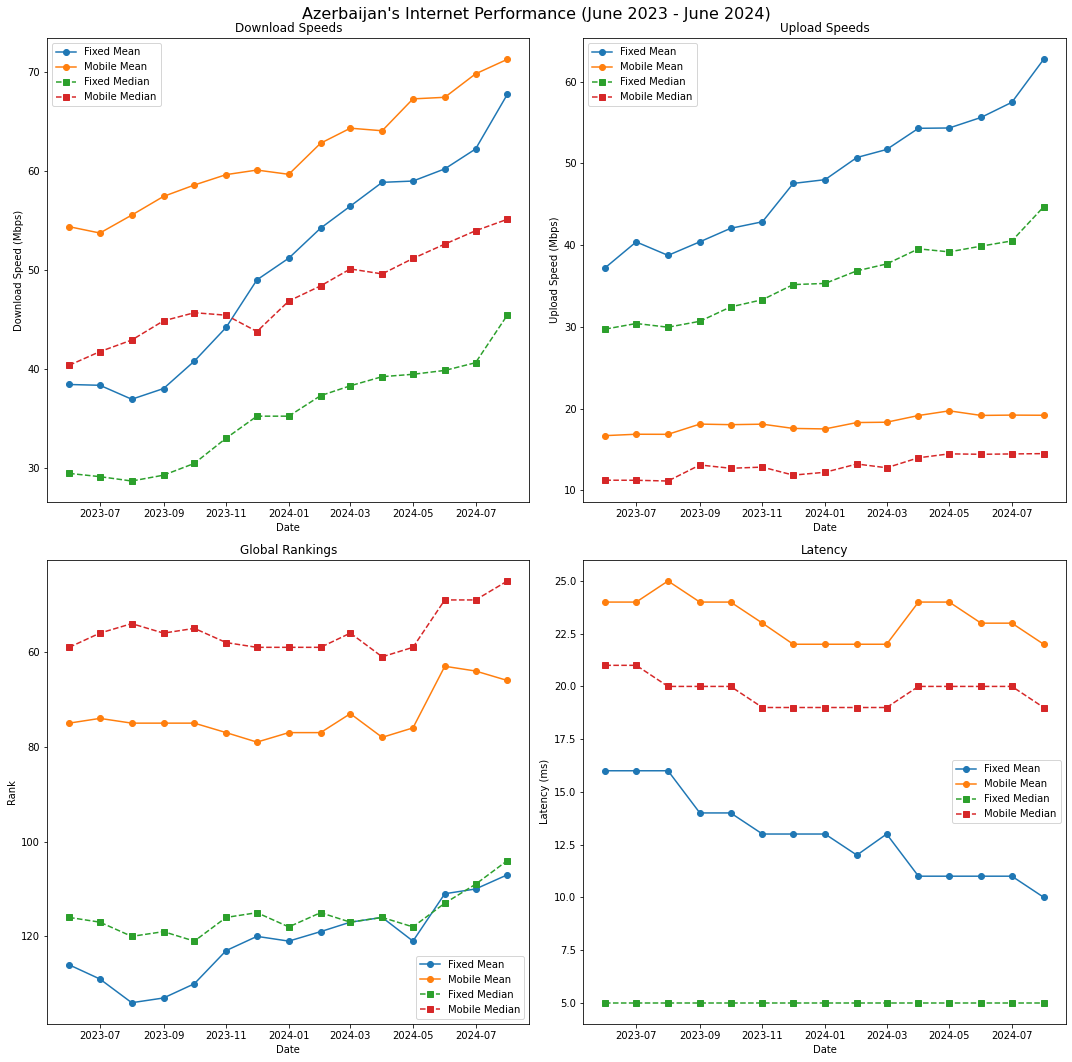


Fixed Mean Broadband Improvements:
Download Speed: 76.25%
Upload Speed: 68.38%
Rank Improvement: 19 positions
Latency Improvement: 37.50%

Mobile Mean Broadband Improvements:
Download Speed: 31.09%
Upload Speed: 14.91%
Rank Improvement: 9 positions
Latency Improvement: 8.33%

Fixed Median Broadband Improvements:
Download Speed: 54.29%
Upload Speed: 50.29%
Rank Improvement: 12 positions
Latency Improvement: 0.00%

Mobile Median Broadband Improvements:
Download Speed: 36.52%
Upload Speed: 28.89%
Rank Improvement: 14 positions
Latency Improvement: 9.52%


## Belarus

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


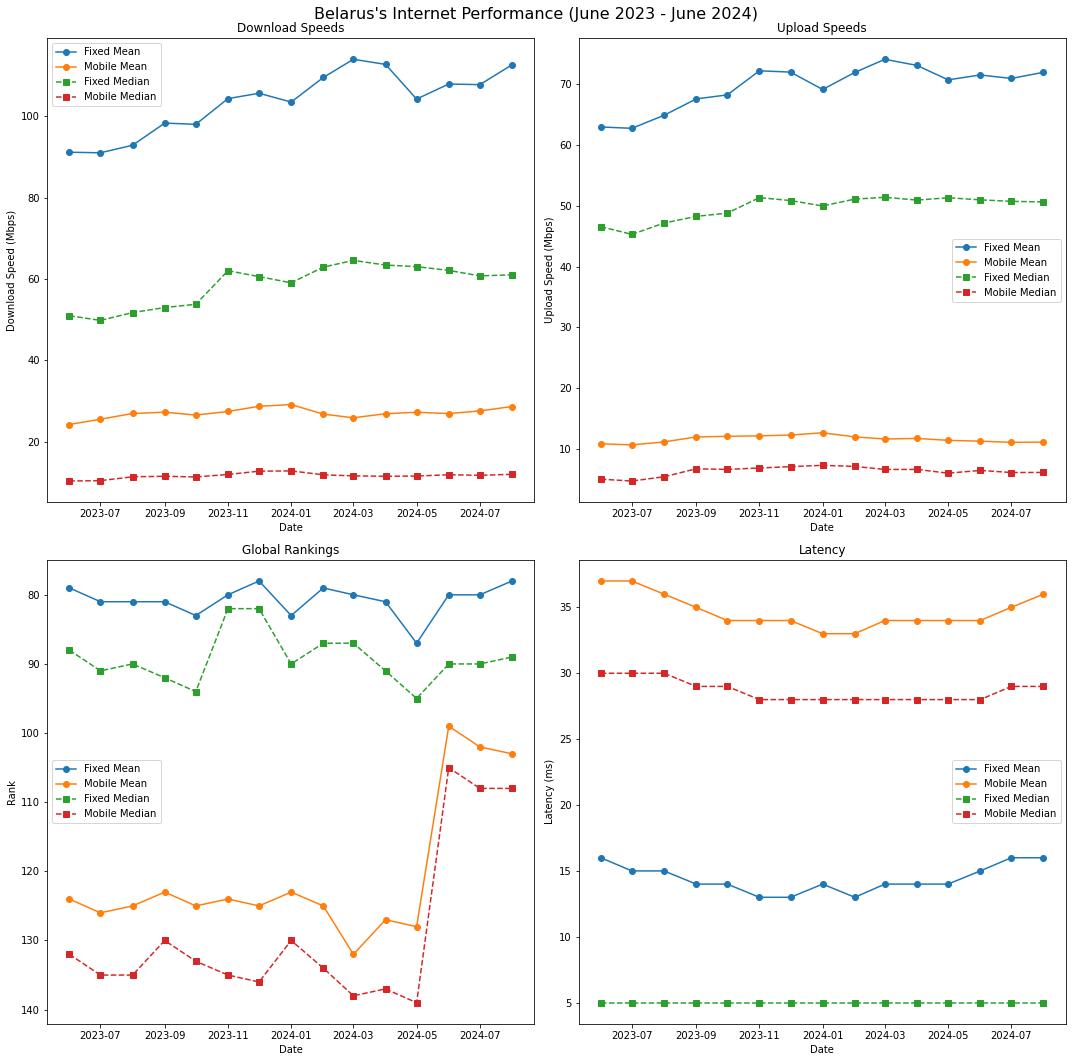


Fixed Mean Broadband Improvements:
Download Speed: 23.58%
Upload Speed: 14.28%
Rank Improvement: 1 positions
Latency Improvement: 0.00%

Mobile Mean Broadband Improvements:
Download Speed: 18.24%
Upload Speed: 2.58%
Rank Improvement: 21 positions
Latency Improvement: 2.70%

Fixed Median Broadband Improvements:
Download Speed: 19.73%
Upload Speed: 8.74%
Rank Improvement: -1 positions
Latency Improvement: 0.00%

Mobile Median Broadband Improvements:
Download Speed: 15.97%
Upload Speed: 22.02%
Rank Improvement: 24 positions
Latency Improvement: 3.33%


## Kazakhstan

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


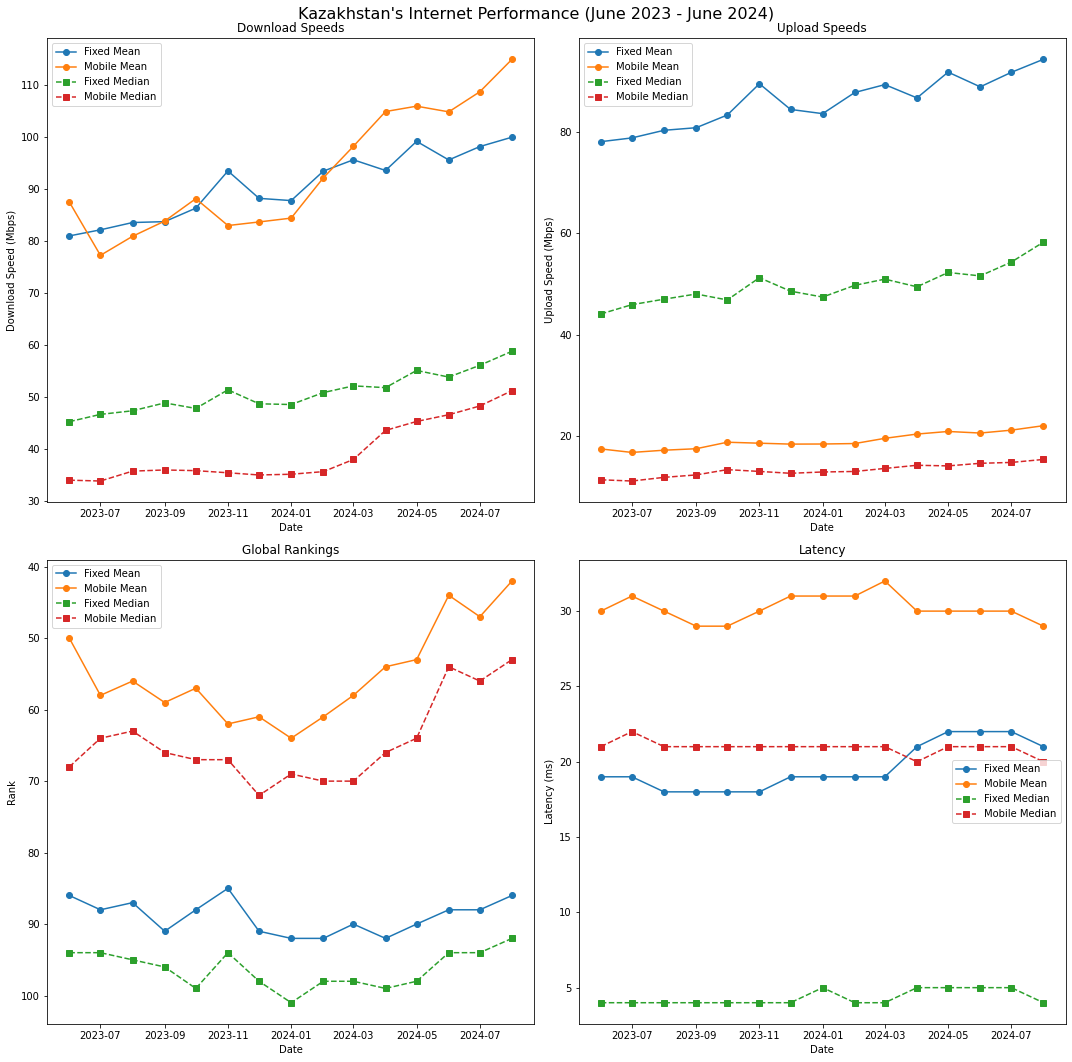


Fixed Mean Broadband Improvements:
Download Speed: 23.41%
Upload Speed: 20.80%
Rank Improvement: 0 positions
Latency Improvement: -10.53%

Mobile Mean Broadband Improvements:
Download Speed: 31.32%
Upload Speed: 26.17%
Rank Improvement: 8 positions
Latency Improvement: 3.33%

Fixed Median Broadband Improvements:
Download Speed: 29.82%
Upload Speed: 32.09%
Rank Improvement: 2 positions
Latency Improvement: 0.00%

Mobile Median Broadband Improvements:
Download Speed: 50.43%
Upload Speed: 35.11%
Rank Improvement: 15 positions
Latency Improvement: 4.76%


## Kyrgyzstan

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


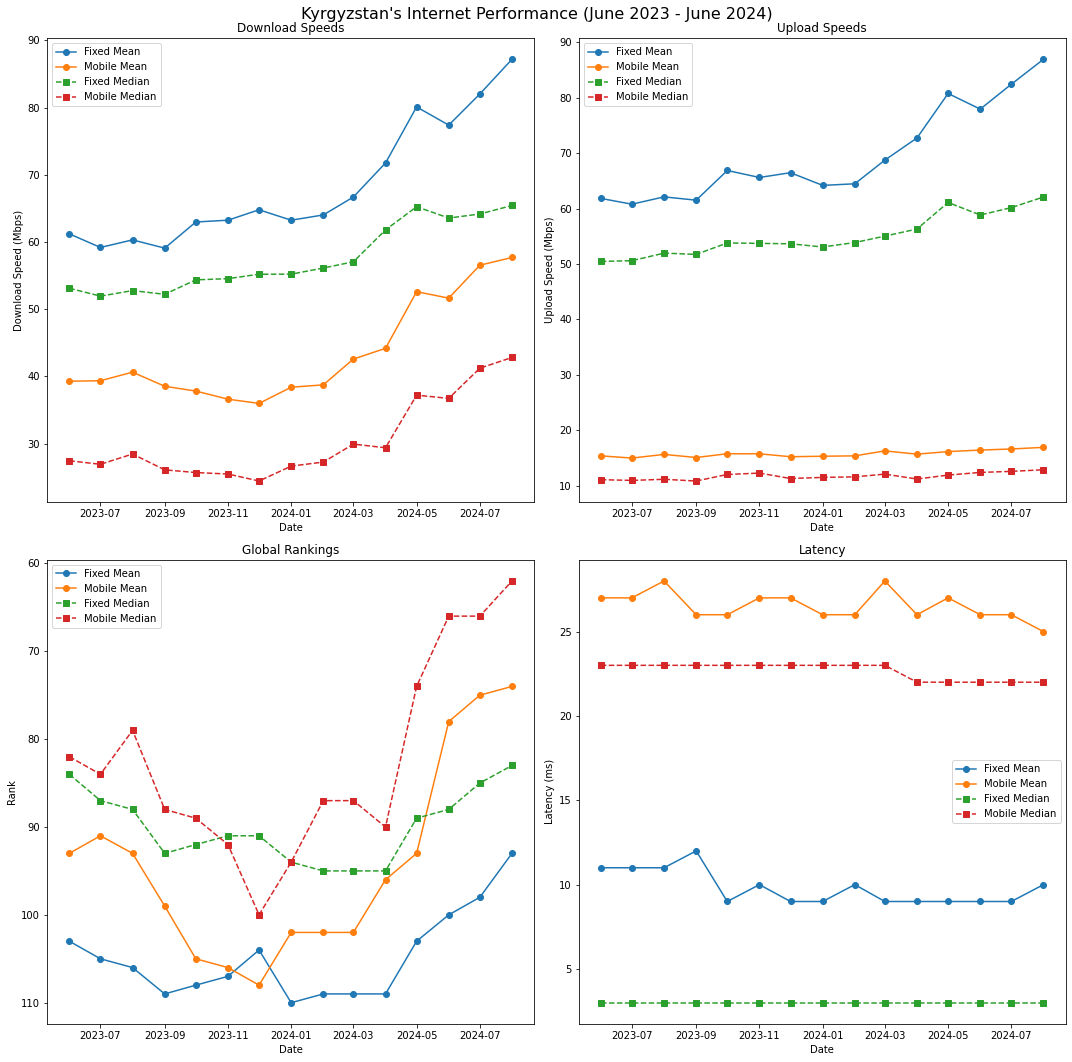


Fixed Mean Broadband Improvements:
Download Speed: 42.44%
Upload Speed: 40.60%
Rank Improvement: 10 positions
Latency Improvement: 9.09%

Mobile Mean Broadband Improvements:
Download Speed: 46.89%
Upload Speed: 9.95%
Rank Improvement: 19 positions
Latency Improvement: 7.41%

Fixed Median Broadband Improvements:
Download Speed: 23.19%
Upload Speed: 23.05%
Rank Improvement: 1 positions
Latency Improvement: 0.00%

Mobile Median Broadband Improvements:
Download Speed: 56.05%
Upload Speed: 16.16%
Rank Improvement: 20 positions
Latency Improvement: 4.35%


## Moldova

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


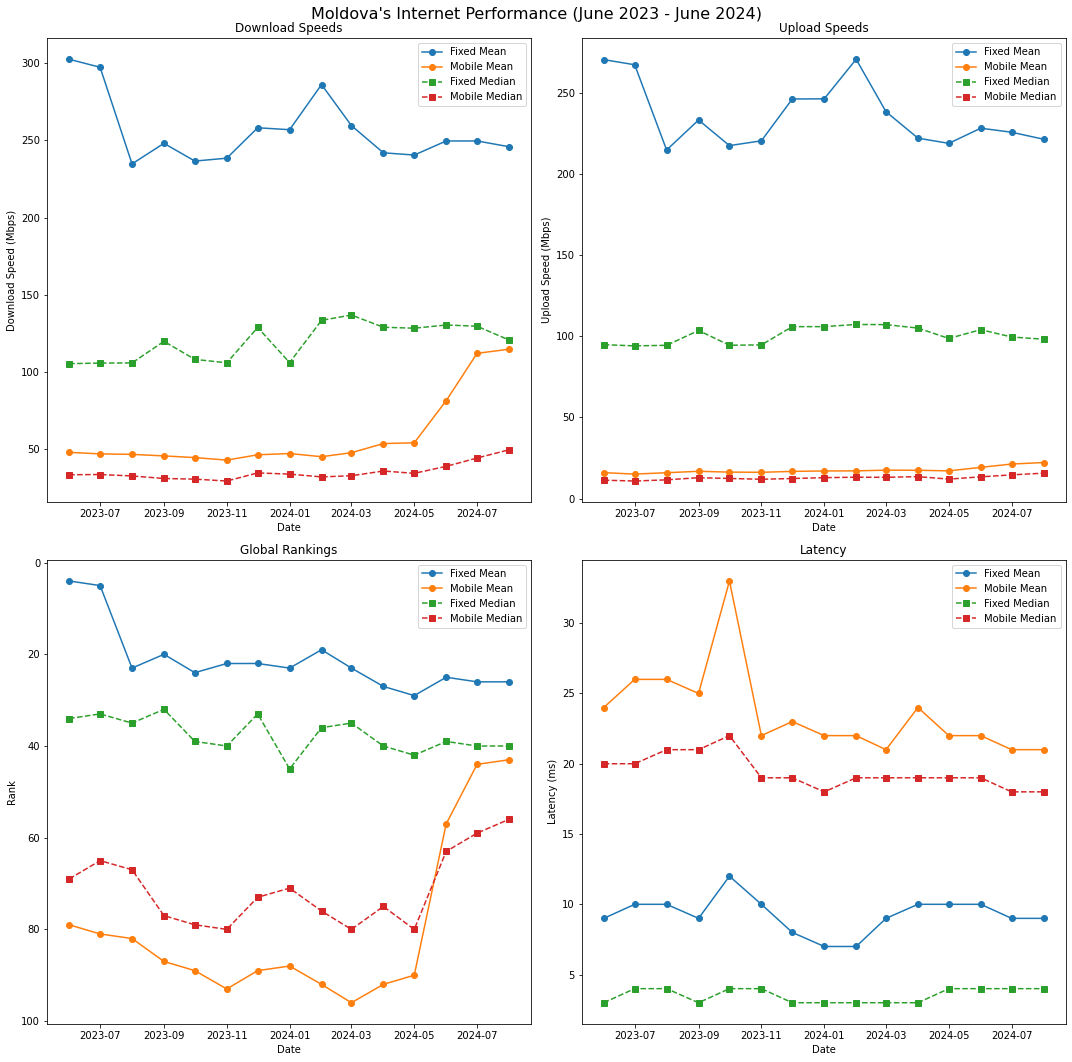


Fixed Mean Broadband Improvements:
Download Speed: -18.71%
Upload Speed: -18.14%
Rank Improvement: -22 positions
Latency Improvement: 0.00%

Mobile Mean Broadband Improvements:
Download Speed: 138.86%
Upload Speed: 39.14%
Rank Improvement: 36 positions
Latency Improvement: 12.50%

Fixed Median Broadband Improvements:
Download Speed: 14.49%
Upload Speed: 3.53%
Rank Improvement: -6 positions
Latency Improvement: -33.33%

Mobile Median Broadband Improvements:
Download Speed: 48.12%
Upload Speed: 38.25%
Rank Improvement: 13 positions
Latency Improvement: 10.00%


## Russia

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


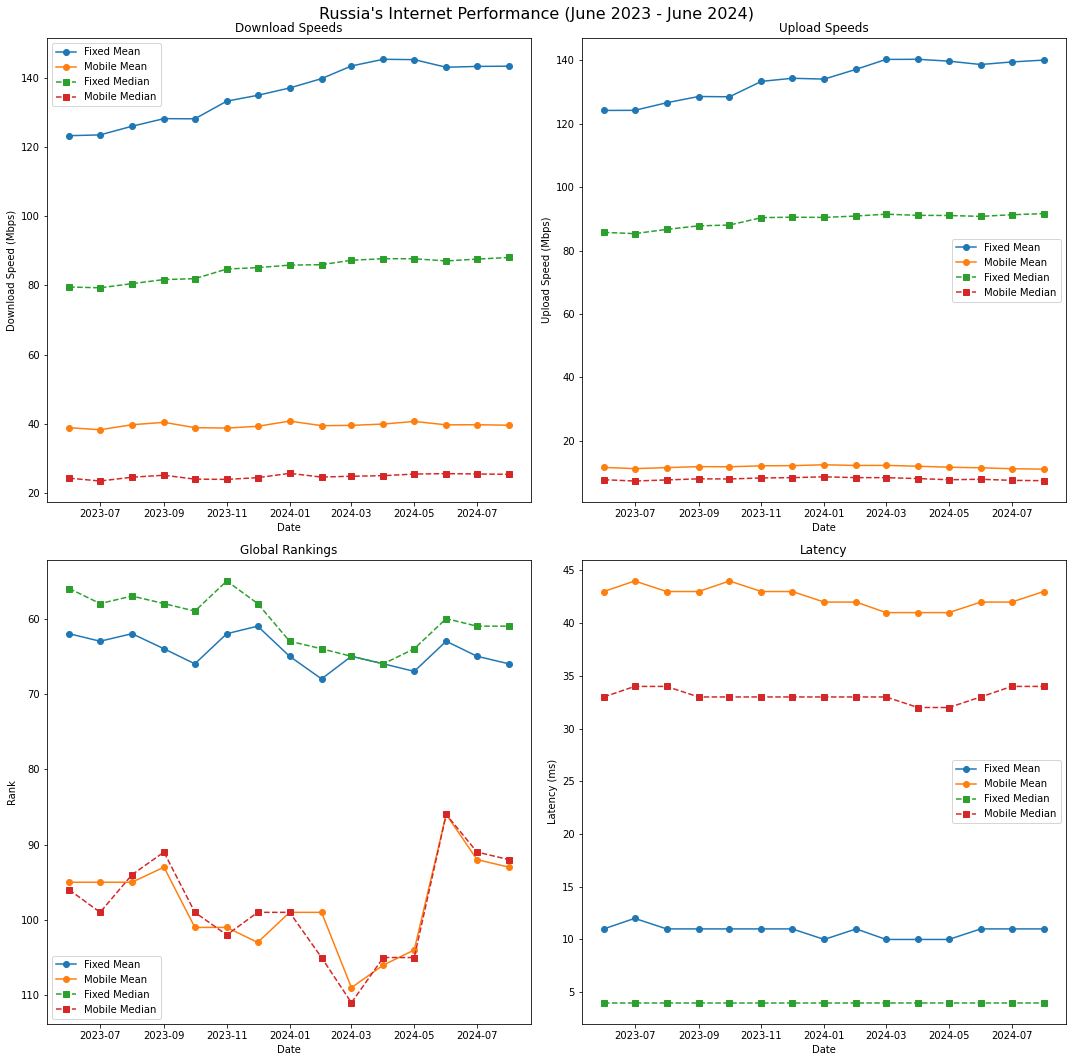


Fixed Mean Broadband Improvements:
Download Speed: 16.29%
Upload Speed: 12.78%
Rank Improvement: -4 positions
Latency Improvement: 0.00%

Mobile Mean Broadband Improvements:
Download Speed: 1.88%
Upload Speed: -4.56%
Rank Improvement: 2 positions
Latency Improvement: 0.00%

Fixed Median Broadband Improvements:
Download Speed: 10.72%
Upload Speed: 6.88%
Rank Improvement: -5 positions
Latency Improvement: 0.00%

Mobile Median Broadband Improvements:
Download Speed: 4.61%
Upload Speed: -3.99%
Rank Improvement: 4 positions
Latency Improvement: -3.03%


## Tajikistan

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


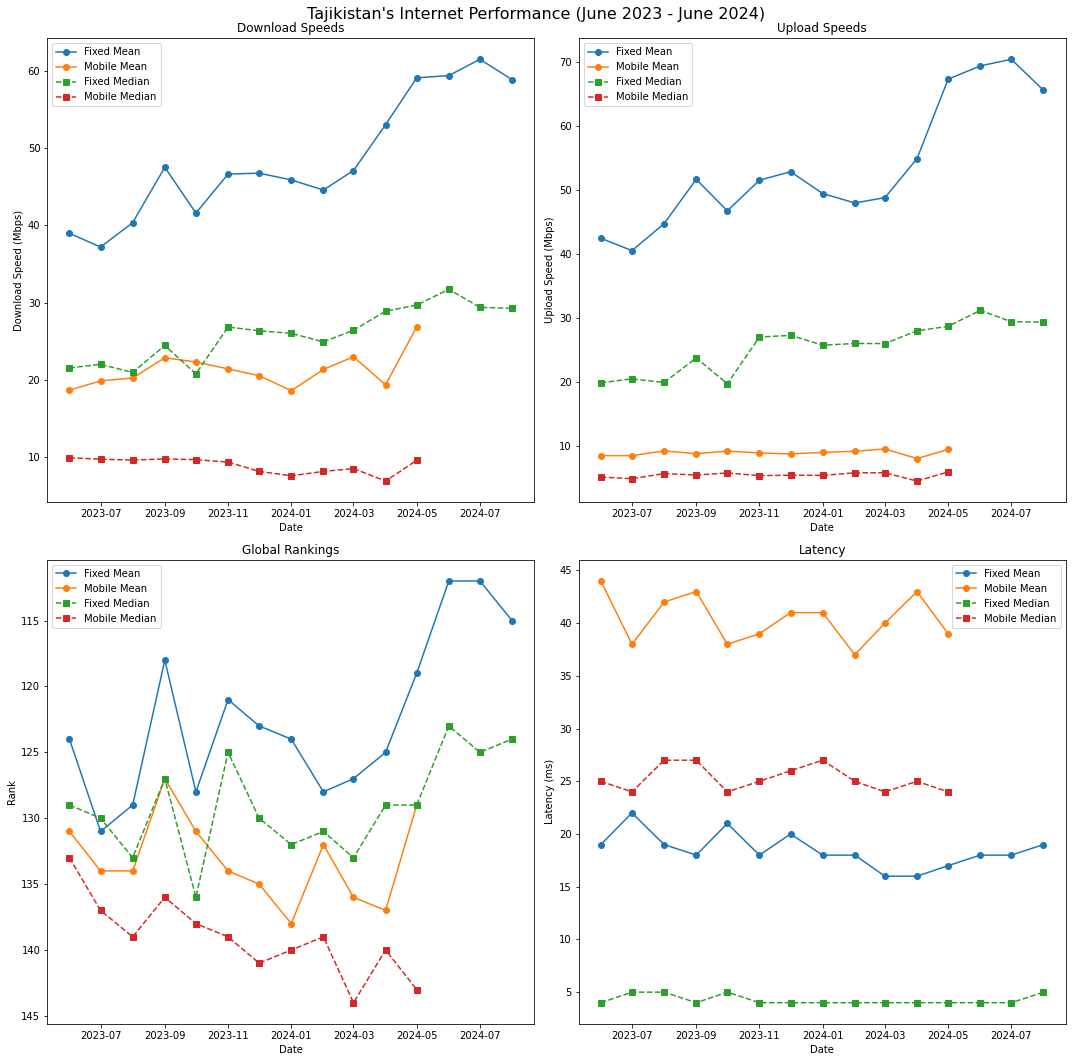


Fixed Mean Broadband Improvements:
Download Speed: 51.09%
Upload Speed: 54.48%
Rank Improvement: 9 positions
Latency Improvement: 0.00%

Mobile Mean Broadband Improvements:
Download Speed: 43.74%
Upload Speed: 11.40%
Rank Improvement: 2 positions
Latency Improvement: 11.36%

Fixed Median Broadband Improvements:
Download Speed: 35.84%
Upload Speed: 47.59%
Rank Improvement: 5 positions
Latency Improvement: -25.00%

Mobile Median Broadband Improvements:
Download Speed: -3.33%
Upload Speed: 15.28%
Rank Improvement: -10 positions
Latency Improvement: 4.00%


## Uzbekistan

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


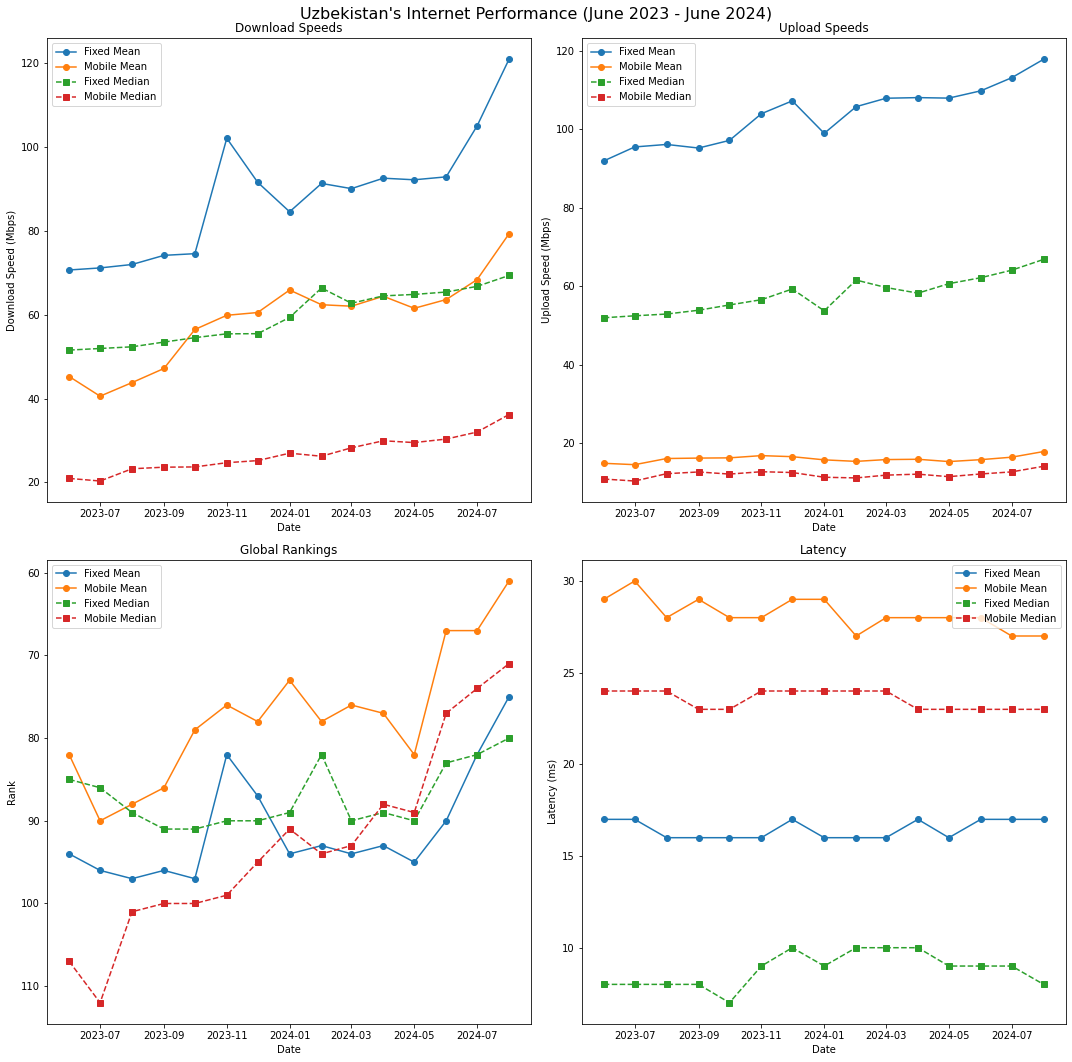


Fixed Mean Broadband Improvements:
Download Speed: 71.12%
Upload Speed: 28.19%
Rank Improvement: 19 positions
Latency Improvement: 0.00%

Mobile Mean Broadband Improvements:
Download Speed: 75.23%
Upload Speed: 20.26%
Rank Improvement: 21 positions
Latency Improvement: 6.90%

Fixed Median Broadband Improvements:
Download Speed: 34.52%
Upload Speed: 28.66%
Rank Improvement: 5 positions
Latency Improvement: 0.00%

Mobile Median Broadband Improvements:
Download Speed: 72.74%
Upload Speed: 30.21%
Rank Improvement: 36 positions
Latency Improvement: 4.17%


In [27]:
def visualization(country):
    data = cis_data[country]
    # Create DataFrames
    df_fixed_mean = pd.DataFrame(data['fixedMean'])
    df_mobile_mean = pd.DataFrame(data['mobileMean'])
    df_fixed_median = pd.DataFrame(data['fixedMedian'])
    df_mobile_median = pd.DataFrame(data['mobileMedian'])

    # Convert date to datetime and other columns to numeric
    for df in [df_fixed_mean, df_mobile_mean, df_fixed_median, df_mobile_median]:
        df['date'] = pd.to_datetime(df['date'], unit='ms')
        for col in ['download_mbps', 'upload_mbps', 'latency_ms', 'rank']:
            df[col] = pd.to_numeric(df[col])

    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(15, 15))
    country_name = country.capitalize()
    fig.suptitle(rf"{country_name}'s Internet Performance (June 2023 - June 2024)", fontsize=16)
    display(Markdown(rf"## {country_name}"))
    # Plot 1: Download speeds
    axs[0, 0].plot(df_fixed_mean['date'], df_fixed_mean['download_mbps'], label='Fixed Mean', marker='o')
    axs[0, 0].plot(df_mobile_mean['date'], df_mobile_mean['download_mbps'], label='Mobile Mean', marker='o')
    axs[0, 0].plot(df_fixed_median['date'], df_fixed_median['download_mbps'], label='Fixed Median', marker='s', linestyle='--')
    axs[0, 0].plot(df_mobile_median['date'], df_mobile_median['download_mbps'], label='Mobile Median', marker='s', linestyle='--')
    axs[0, 0].set_title('Download Speeds')
    axs[0, 0].set_xlabel('Date')
    axs[0, 0].set_ylabel('Download Speed (Mbps)')
    axs[0, 0].legend()

    # Plot 2: Upload speeds
    axs[0, 1].plot(df_fixed_mean['date'], df_fixed_mean['upload_mbps'], label='Fixed Mean', marker='o')
    axs[0, 1].plot(df_mobile_mean['date'], df_mobile_mean['upload_mbps'], label='Mobile Mean', marker='o')
    axs[0, 1].plot(df_fixed_median['date'], df_fixed_median['upload_mbps'], label='Fixed Median', marker='s', linestyle='--')
    axs[0, 1].plot(df_mobile_median['date'], df_mobile_median['upload_mbps'], label='Mobile Median', marker='s', linestyle='--')
    axs[0, 1].set_title('Upload Speeds')
    axs[0, 1].set_xlabel('Date')
    axs[0, 1].set_ylabel('Upload Speed (Mbps)')
    axs[0, 1].legend()

    # Plot 3: Global rankings
    axs[1, 0].plot(df_fixed_mean['date'], df_fixed_mean['rank'], label='Fixed Mean', marker='o')
    axs[1, 0].plot(df_mobile_mean['date'], df_mobile_mean['rank'], label='Mobile Mean', marker='o')
    axs[1, 0].plot(df_fixed_median['date'], df_fixed_median['rank'], label='Fixed Median', marker='s', linestyle='--')
    axs[1, 0].plot(df_mobile_median['date'], df_mobile_median['rank'], label='Mobile Median', marker='s', linestyle='--')
    axs[1, 0].set_title('Global Rankings')
    axs[1, 0].set_xlabel('Date')
    axs[1, 0].set_ylabel('Rank')
    axs[1, 0].invert_yaxis()  # Invert y-axis for rankings
    axs[1, 0].legend()

    # Plot 4: Latency
    axs[1, 1].plot(df_fixed_mean['date'], df_fixed_mean['latency_ms'], label='Fixed Mean', marker='o')
    axs[1, 1].plot(df_mobile_mean['date'], df_mobile_mean['latency_ms'], label='Mobile Mean', marker='o')
    axs[1, 1].plot(df_fixed_median['date'], df_fixed_median['latency_ms'], label='Fixed Median', marker='s', linestyle='--')
    axs[1, 1].plot(df_mobile_median['date'], df_mobile_median['latency_ms'], label='Mobile Median', marker='s', linestyle='--')
    axs[1, 1].set_title('Latency')
    axs[1, 1].set_xlabel('Date')
    axs[1, 1].set_ylabel('Latency (ms)')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.savefig(rf"./images/{country}.eps", dpi=300, bbox_inches='tight')
    plt.show()    
    # Calculate and print improvements
    for name, df in [('Fixed Mean', df_fixed_mean), ('Mobile Mean', df_mobile_mean), 
                     ('Fixed Median', df_fixed_median), ('Mobile Median', df_mobile_median)]:
        download_improvement = (df['download_mbps'].iloc[-1] - df['download_mbps'].iloc[0]) / df['download_mbps'].iloc[0] * 100
        upload_improvement = (df['upload_mbps'].iloc[-1] - df['upload_mbps'].iloc[0]) / df['upload_mbps'].iloc[0] * 100
        rank_improvement = df['rank'].iloc[0] - df['rank'].iloc[-1]
        latency_improvement = (df['latency_ms'].iloc[0] - df['latency_ms'].iloc[-1]) / df['latency_ms'].iloc[0] * 100
        
        print(f"\n{name} Broadband Improvements:")
        print(f"Download Speed: {download_improvement:.2f}%")
        print(f"Upload Speed: {upload_improvement:.2f}%")
        print(f"Rank Improvement: {rank_improvement} positions")
        print(f"Latency Improvement: {latency_improvement:.2f}%")
        # Assuming df_fixed_mean, df_mobile_mean, df_fixed_median, df_mobile_median are already defined
        
res = [visualization(country) for country in cis_countries if country != "turkmenistan"]

## Kernel Density Plots For Internet Performance Indicators Over Time

In [29]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# display(Markdown(rf"# Kernel Density Plots Using Time Series"))

# def kde_plots(country):
#     data = cis_data[country]
#     # Create DataFrames
#     df_fixed_mean = pd.DataFrame(data['fixedMean'])
#     df_mobile_mean = pd.DataFrame(data['mobileMean'])
#     df_fixed_median = pd.DataFrame(data['fixedMedian'])
#     df_mobile_median = pd.DataFrame(data['mobileMedian'])

#     # Convert date to datetime and other columns to numeric
#     for df in [df_fixed_mean, df_mobile_mean, df_fixed_median, df_mobile_median]:
#         df['date'] = pd.to_datetime(df['date'], unit='ms')
#         for col in ['download_mbps', 'upload_mbps']:
#             df[col] = pd.to_numeric(df[col])

#     # Set up the plot
#     fig, axes = plt.subplots(2, 2, figsize=(20, 16))
#     country_name = country.capitalize()
#     display(Markdown(rf"## {country_name}"))
#     fig.suptitle(f"{country_name}'s KDE Plots for Internet Speeds", fontsize=16)

#     # Download speeds KDE plot
#     sns.kdeplot(data=df_fixed_mean, x='download_mbps', ax=axes[0, 0], label='Fixed Mean', shade=True)
#     sns.kdeplot(data=df_mobile_mean, x='download_mbps', ax=axes[0, 0], label='Mobile Mean', shade=True)
#     sns.kdeplot(data=df_fixed_median, x='download_mbps', ax=axes[0, 0], label='Fixed Median', shade=True)
#     sns.kdeplot(data=df_mobile_median, x='download_mbps', ax=axes[0, 0], label='Mobile Median', shade=True)
#     axes[0, 0].set_title('Download Speeds')
#     axes[0, 0].set_xlabel('Download Speed (Mbps)')
#     axes[0, 0].legend()

#     # Upload speeds KDE plot
#     sns.kdeplot(data=df_fixed_mean, x='upload_mbps', ax=axes[0, 1], label='Fixed Mean', shade=True)
#     sns.kdeplot(data=df_mobile_mean, x='upload_mbps', ax=axes[0, 1], label='Mobile Mean', shade=True)
#     sns.kdeplot(data=df_fixed_median, x='upload_mbps', ax=axes[0, 1], label='Fixed Median', shade=True)
#     sns.kdeplot(data=df_mobile_median, x='upload_mbps', ax=axes[0, 1], label='Mobile Median', shade=True)
#     axes[0, 1].set_title('Upload Speeds')
#     axes[0, 1].set_xlabel('Upload Speed (Mbps)')
#     axes[0, 1].legend()

#     # Download speeds over time
#     axes[1, 0].plot(df_fixed_mean['date'], df_fixed_mean['download_mbps'], label='Fixed Mean')
#     axes[1, 0].plot(df_mobile_mean['date'], df_mobile_mean['download_mbps'], label='Mobile Mean')
#     axes[1, 0].plot(df_fixed_median['date'], df_fixed_median['download_mbps'], label='Fixed Median')
#     axes[1, 0].plot(df_mobile_median['date'], df_mobile_median['download_mbps'], label='Mobile Median')
#     axes[1, 0].set_title('Download Speeds Over Time')
#     axes[1, 0].set_xlabel('Date')
#     axes[1, 0].set_ylabel('Download Speed (Mbps)')
#     axes[1, 0].legend()

#     # Upload speeds over time
#     axes[1, 1].plot(df_fixed_mean['date'], df_fixed_mean['upload_mbps'], label='Fixed Mean')
#     axes[1, 1].plot(df_mobile_mean['date'], df_mobile_mean['upload_mbps'], label='Mobile Mean')
#     axes[1, 1].plot(df_fixed_median['date'], df_fixed_median['upload_mbps'], label='Fixed Median')
#     axes[1, 1].plot(df_mobile_median['date'], df_mobile_median['upload_mbps'], label='Mobile Median')
#     axes[1, 1].set_title('Upload Speeds Over Time')
#     axes[1, 1].set_xlabel('Date')
#     axes[1, 1].set_ylabel('Upload Speed (Mbps)')
#     axes[1, 1].legend()

#     plt.tight_layout()
#     plt.show()

#     # Print summary statistics
#     for name, df in [('Fixed Mean', df_fixed_mean), ('Mobile Mean', df_mobile_mean), 
#                      ('Fixed Median', df_fixed_median), ('Mobile Median', df_mobile_median)]:
#         print(f"\n{name} Summary:")
#         print(f"Download Speed: Mean = {df['download_mbps'].mean():.2f} Mbps, Std = {df['download_mbps'].std():.2f} Mbps")
#         print(f"Upload Speed: Mean = {df['upload_mbps'].mean():.2f} Mbps, Std = {df['upload_mbps'].std():.2f} Mbps")

# # Example usage
# # lst = [kde_plots(country) for country in cis_countries if country != "turkmenistan"]

# Kernel Density Plots Using Time Series

# Growth Rate of Internet Performance Indicators For CIS Countries During 06.2023-06.2024

In [30]:
# cis_data["azerbaijan"]["fixedMean"]

In [14]:
def summary_stat(country):
    data = cis_data[country]
    # Create DataFrames
    df_fixed_mean = pd.DataFrame(data['fixedMean'])
    df_mobile_mean = pd.DataFrame(data['mobileMean'])
    df_fixed_median = pd.DataFrame(data['fixedMedian'])
    df_mobile_median = pd.DataFrame(data['mobileMedian'])
    # Convert date to datetime and other columns to numeric
    for df in [df_fixed_mean, df_mobile_mean, df_fixed_median, df_mobile_median]:
        df['date'] = pd.to_datetime(df['date'], unit='ms')
        for col in ['download_mbps', 'upload_mbps', 'latency_ms', 'rank']:
            df[col] = pd.to_numeric(df[col])
        # Loop through each dataframe and calculate the improvements
    results = []   
    for name, df in [('Fixed Mean', df_fixed_mean), ('Mobile Mean', df_mobile_mean), 
                    ('Fixed Median', df_fixed_median), ('Mobile Median', df_mobile_median)]:
        download_improvement = np.round((df['download_mbps'].iloc[-1] - df['download_mbps'].iloc[0]) / df['download_mbps'].iloc[0] * 100,2)
        upload_improvement = np.round((df['upload_mbps'].iloc[-1] - df['upload_mbps'].iloc[0]) / df['upload_mbps'].iloc[0] * 100,2)
        rank_improvement = df['rank'].iloc[-1] - df['rank'].iloc[0]
        latency_improvement = np.round((df['latency_ms'].iloc[-1] - df['latency_ms'].iloc[0]) / df['latency_ms'].iloc[0] * 100, 2)       
        results.append({
        'Country': country,
        'Name': name,
        'Download Improvement (%)': download_improvement,
        'Upload Improvement (%)': upload_improvement,
        'Rank Improvement (positions)': rank_improvement,
        'Latency Improvement (%)': latency_improvement
    })
    return results

info = [summary_stat(country) for country in cis_countries]

# Flatten the list of lists into a single list of dictionaries
flattened_data = [item for sublist in info for item in sublist]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(flattened_data)

# Set the multi-index with 'Country' and 'Name'
df.set_index(['Country', 'Name'], inplace=True)

# Print the resulting DataFrame
# df

## Side By Side Visualization

In [18]:
cis_data.head()

AttributeError: 'dict' object has no attribute 'head'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


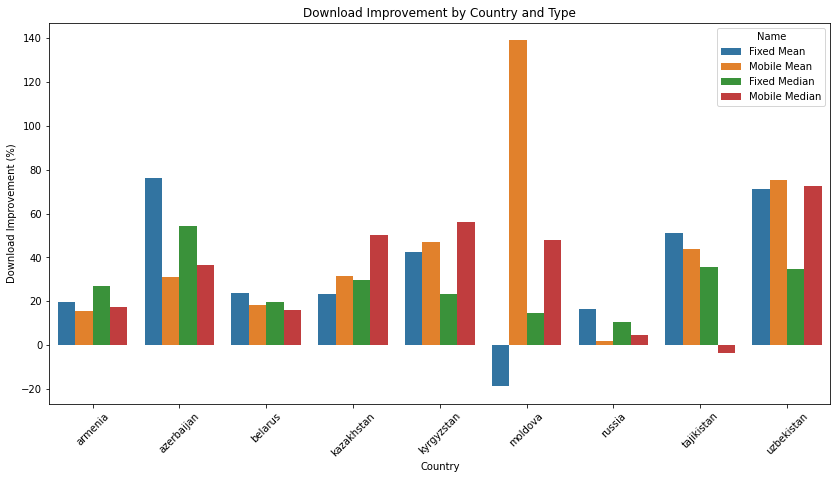

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


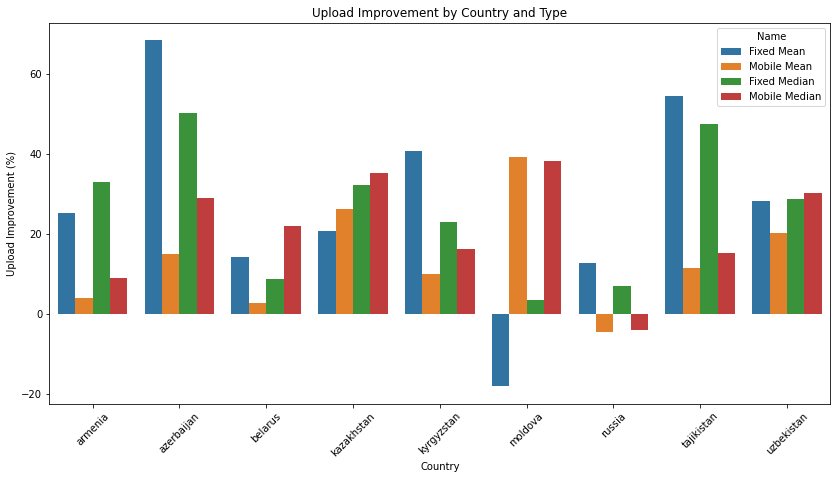

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
df = df.reset_index()
# Plotting Download Improvement
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Download Improvement (%)', hue='Name', data=df)
plt.title('Download Improvement by Country and Type')
plt.xticks(rotation=45)
plt.savefig("download.eps", dpi=300, bbox_inches='tight')
plt.show()

# Plotting Upload Improvement
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Upload Improvement (%)', hue='Name', data=df)
plt.title('Upload Improvement by Country and Type')
plt.xticks(rotation=45)
plt.savefig("upload.eps", dpi=300, bbox_inches='tight')
plt.show()

## Convert To Latex

In [33]:
# Convert the DataFrame to a LaTeX table
latex_table = df.to_latex(multicolumn=True, multirow=True, bold_rows=True)

# Print the LaTeX table
# print(latex_table)

C:\Users\samir\AppData\Local\Temp\ipykernel_22604\1065614364.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(multicolumn=True, multirow=True, bold_rows=True)


# Forecasts of Time Series of Internet Performance Indicators for Azerbaijan

In [34]:
data = cis_data["azerbaijan"]
# Convert to DataFrames
fixed_mean_df = pd.DataFrame(data['fixedMean'])
fixed_median_df = pd.DataFrame(data['fixedMedian'])
mobile_mean_df = pd.DataFrame(data['mobileMean'])
mobile_median_df = pd.DataFrame(data['mobileMedian'])

# Convert date strings to datetime objects
for df in [fixed_mean_df, fixed_median_df, mobile_mean_df, mobile_median_df]:
    df['global_index_date'] = pd.to_datetime(df['global_index_date'])
    df['download_mbps'] = df['download_mbps'].astype(float)
    df['upload_mbps'] = df['upload_mbps'].astype(float)

from statsmodels.tsa.arima.model import ARIMA
import numpy as np

def forecast_arima(df, column, steps=12):
    model = ARIMA(df[column], order=(1, 1, 1), trend = "t")
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    stderr = model_fit.bse
    conf_int = model_fit.get_forecast(steps=steps).conf_int(alpha=0.05)
    return forecast, stderr, conf_int

# Forecast for each type
forecasts = {}
for name, df in zip(['fixed_mean', 'fixed_median', 'mobile_mean', 'mobile_median'],
                    [fixed_mean_df, fixed_median_df, mobile_mean_df, mobile_median_df]):
    forecasts[name] = {}
    for column in ['download_mbps', 'upload_mbps']:
        forecasts[name][column] = forecast_arima(df, column)

# Example output
print(forecasts['fixed_mean']['download_mbps'])

C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-

(15    71.823629
16    74.782552
17    77.292976
18    79.619652
19    81.871046
20    84.091598
21    86.299514
22    88.502254
23    90.702872
24    92.902621
25    95.102014
26    97.301261
Name: predicted_mean, dtype: float64, x1        0.796859
ar.L1     0.952135
ma.L1     1.191461
sigma2    1.184568
dtype: float64,     lower download_mbps  upper download_mbps
15            68.716533            74.930725
16            69.039435            80.525668
17            69.316139            85.269813
18            69.742299            89.497005
19            70.343311            93.398782
20            71.099498            97.083698
21            71.983811           100.615218
22            72.972214           104.032293
23            74.045588           107.360155
24            75.189221           110.616020
25            76.391837           113.812190
26            77.644718           116.957804)


In [35]:
a,b,c = forecasts['fixed_mean']['download_mbps']

In [36]:
b

x1        0.796859
ar.L1     0.952135
ma.L1     1.191461
sigma2    1.184568
dtype: float64

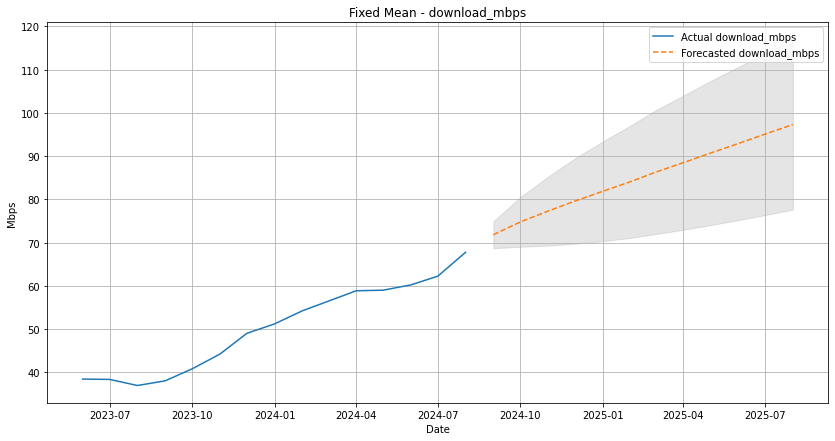

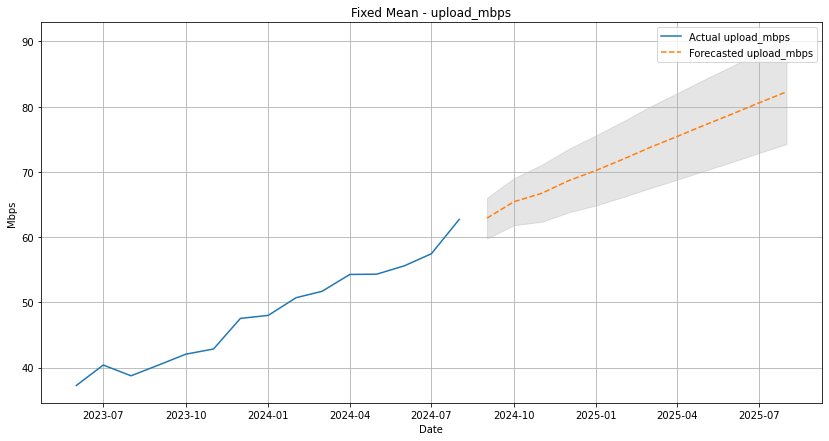

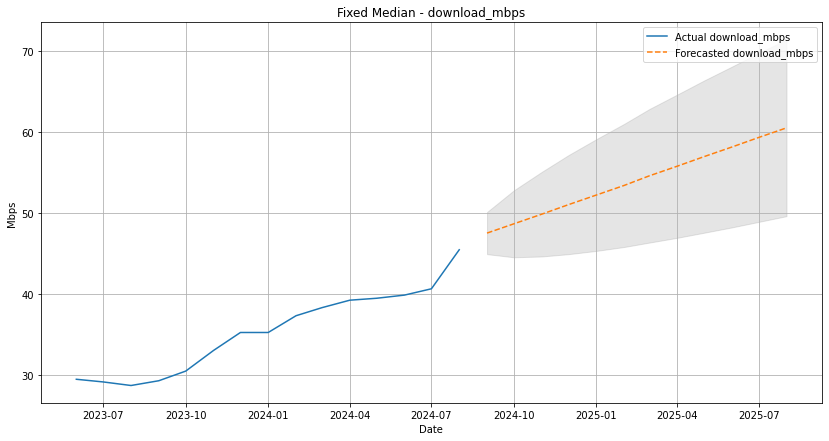

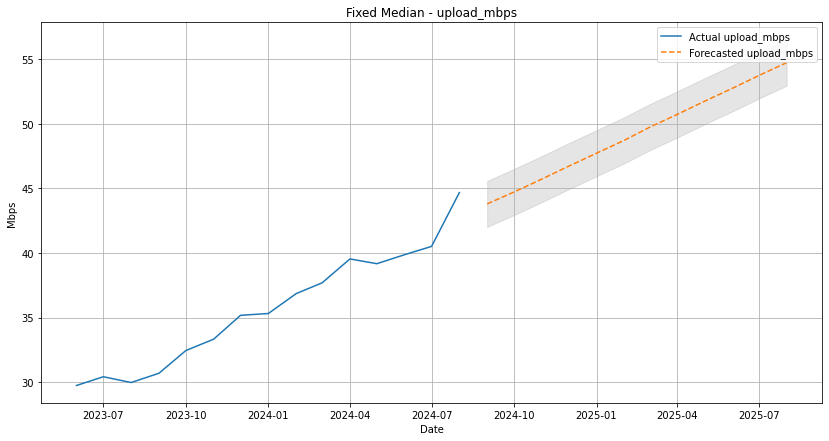

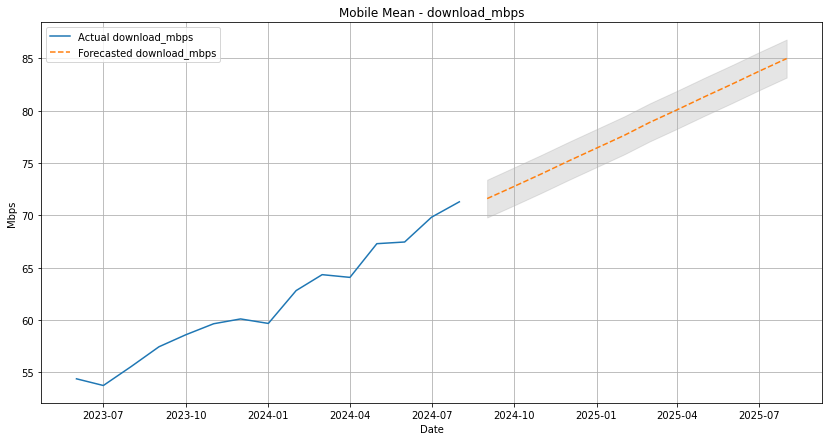

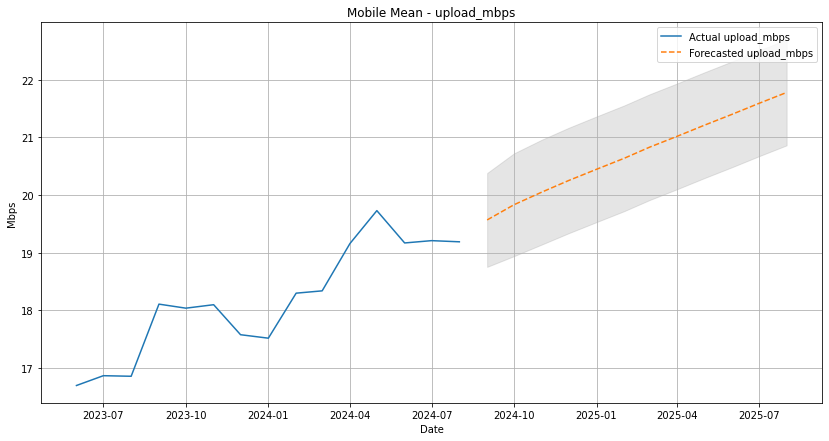

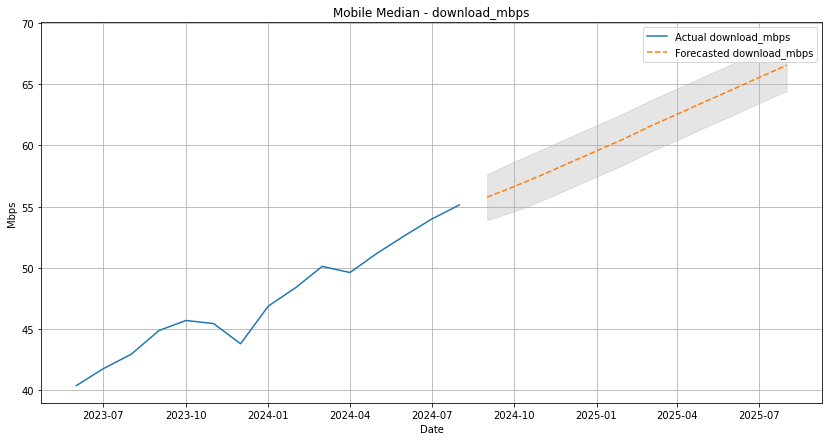

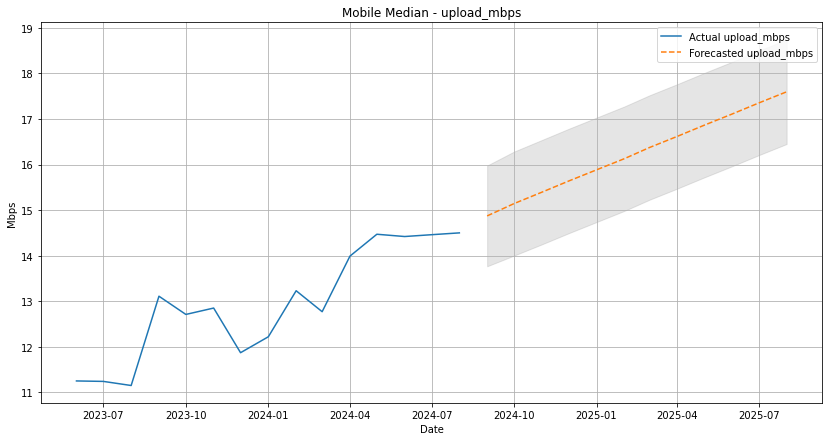

In [37]:
def plot_forecast(df, forecast, conf_int, title, column):
    forecast_dates = pd.date_range(start=df['global_index_date'].iloc[-1], periods=len(forecast) + 1, freq='MS')[1:]
    
    plt.figure(figsize=(14, 7))
    plt.plot(df['global_index_date'], df[column], label=f'Actual {column}')
    plt.plot(forecast_dates, forecast, label=f'Forecasted {column}', linestyle='--')
    plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2)
    plt.xlabel('Date')
    plt.ylabel('Mbps')
    plt.title(f'{title} - {column}')
    plt.legend()
    plt.grid(True)
    plt.show()

for name, df in zip(['fixed_mean', 'fixed_median', 'mobile_mean', 'mobile_median'],
                    [fixed_mean_df, fixed_median_df, mobile_mean_df, mobile_median_df]):
    for column in ['download_mbps', 'upload_mbps']:
        forecast, lags, conf_int = forecasts[name][column]
        plot_forecast(df, forecast, conf_int, name.replace('_', ' ').title(), column)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


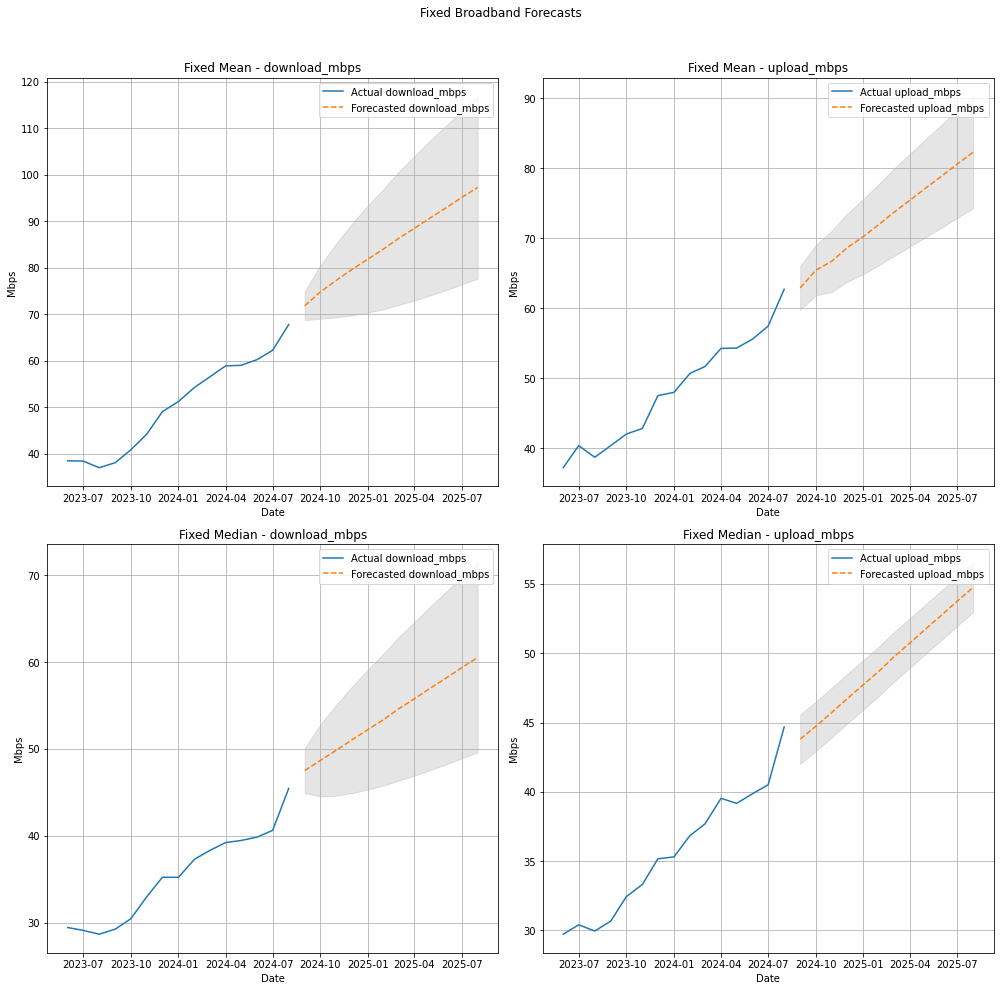

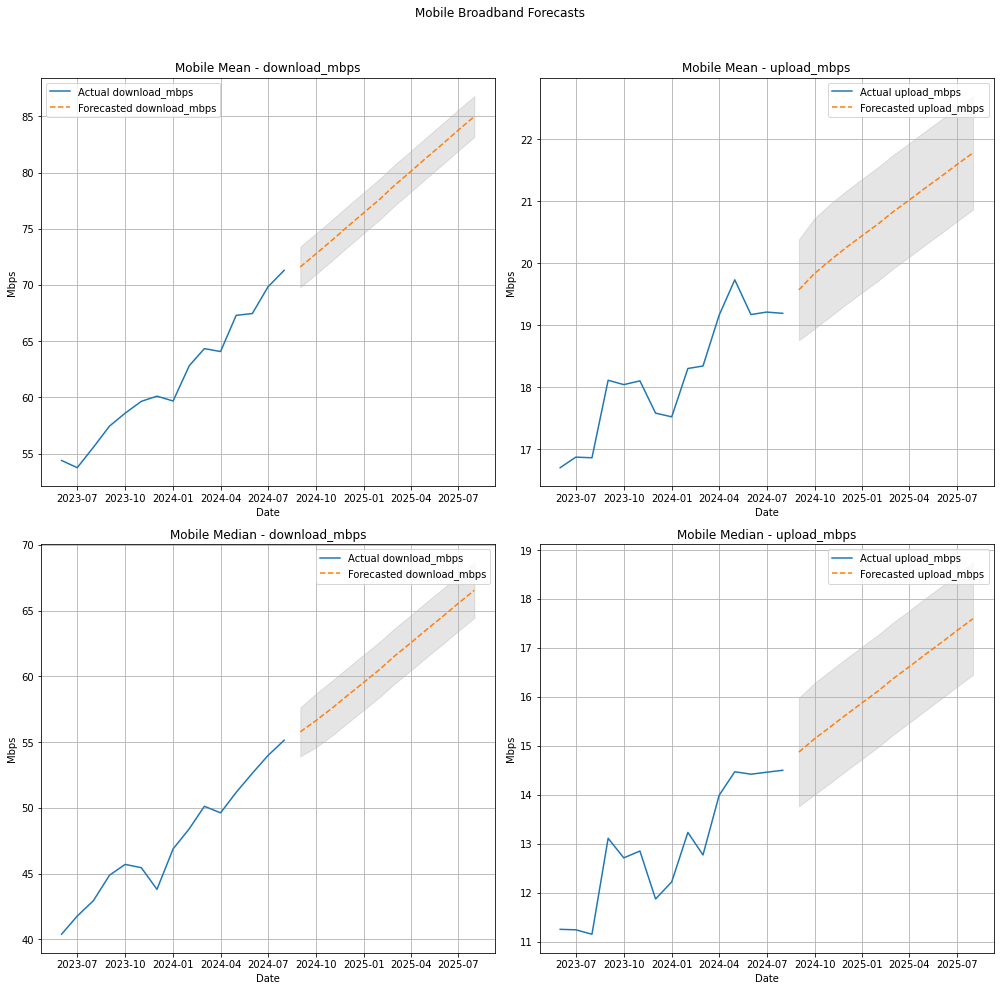

In [43]:
def plot_forecast(ax, df, forecast, conf_int, title, column):
    forecast_dates = pd.date_range(start=df['global_index_date'].iloc[-1], periods=len(forecast) + 1, freq='MS')[1:]
    
    ax.plot(df['global_index_date'], df[column], label=f'Actual {column}')
    ax.plot(forecast_dates, forecast, label=f'Forecasted {column}', linestyle='--')
    ax.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Mbps')
    ax.set_title(f'{title} - {column}')
    ax.legend()
    ax.grid(True)

# Create the first figure with the first four plots
fig1, axs1 = plt.subplots(2, 2, figsize=(14, 14))
fig1.suptitle('Fixed Broadband Forecasts')

for i, (name, df) in enumerate(zip(['fixed_mean', 'fixed_median'], [fixed_mean_df, fixed_median_df])):
    for j, column in enumerate(['download_mbps', 'upload_mbps']):
        forecast, info, conf_int = forecasts[name][column]
        plot_forecast(axs1[i, j], df, forecast, conf_int, name.replace('_', ' ').title(), column)

fig1.tight_layout(rect=[0, 0, 1, 0.96])
fig1.savefig('fixed_broadband_forecasts.eps')

# Create the second figure with the next four plots
fig2, axs2 = plt.subplots(2, 2, figsize=(14, 14))
fig2.suptitle('Mobile Broadband Forecasts')

for i, (name, df) in enumerate(zip(['mobile_mean', 'mobile_median'], [mobile_mean_df, mobile_median_df])):
    for j, column in enumerate(['download_mbps', 'upload_mbps']):
        forecast, info, conf_int = forecasts[name][column]
        plot_forecast(axs2[i, j], df, forecast, conf_int, name.replace('_', ' ').title(), column)

fig2.tight_layout(rect=[0, 0, 1, 0.96])
fig2.savefig('mobile_broadband_forecasts.eps')

plt.show()


In [42]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

def forecast_arima_with_break(df, column, break_date, steps=12):
    # Convert break_date to datetime if it's not already
    break_date = pd.to_datetime(break_date)
    
    # Ensure the dataframe index is datetime
    df['global_index_date'] = pd.to_datetime(df['global_index_date'])
    df = df.set_index('global_index_date')
    
    # Sort the dataframe by date
    df = df.sort_index()
    
    # Split the data into two parts
    df_before = df[df.index < break_date]
    df_after = df[df.index >= break_date]
    
    # Check if there's enough data after the break
    if len(df_after) < 3:  # Minimum number of observations needed for ARIMA
        print("Not enough data after the break. Using all data for the model.")
        df_after = df
    
    # Fit ARIMA model to the data after the break
    model_after = ARIMA(df_after[column], order=(1, 1, 1), trend="t")
    model_fit_after = model_after.fit()
    
    # Use the model after the break for forecasting
    forecast = model_fit_after.forecast(steps=steps)
    stderr = model_fit_after.bse
    conf_int = model_fit_after.get_forecast(steps=steps).conf_int(alpha=0.05)
    
    return forecast, stderr, conf_int

# Specify the break date (August 1, 2024 in this example)
break_date = '2024-08-01'

# Forecast for each type
forecasts = {}
for name, df in zip(['fixed_mean', 'fixed_median', 'mobile_mean', 'mobile_median'],
                    [fixed_mean_df, fixed_median_df, mobile_mean_df, mobile_median_df]):
    forecasts[name] = {}
    for column in ['download_mbps', 'upload_mbps']:
        try:
            forecasts[name][column] = forecast_arima_with_break(df, column, break_date)
        except Exception as e:
            print(f"Error forecasting {name} {column}: {str(e)}")
            forecasts[name][column] = None

# Example output
for name in forecasts:
    for column in ['download_mbps', 'upload_mbps']:
        if forecasts[name][column] is not None:
            print(f"{name} - {column}:")
            print(forecasts[name][column][0])  # Print the forecast
            print()

Not enough data after the break. Using all data for the model.
Not enough data after the break. Using all data for the model.
Not enough data after the break. Using all data for the model.


C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: Valu

Not enough data after the break. Using all data for the model.


C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Not enough data after the break. Using all data for the model.
Not enough data after the break. Using all data for the model.


C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: Valu

Not enough data after the break. Using all data for the model.


C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\samir\AppData\Roaming\Python\Python38\site-package

Not enough data after the break. Using all data for the model.
fixed_mean - download_mbps:
2024-09-01    71.823629
2024-10-01    74.782552
2024-11-01    77.292976
2024-12-01    79.619652
2025-01-01    81.871046
2025-02-01    84.091598
2025-03-01    86.299514
2025-04-01    88.502254
2025-05-01    90.702872
2025-06-01    92.902621
2025-07-01    95.102014
2025-08-01    97.301261
Freq: MS, Name: predicted_mean, dtype: float64

fixed_mean - upload_mbps:
2024-09-01    62.914967
2024-10-01    65.430029
2024-11-01    66.719336
2024-12-01    68.656236
2025-01-01    70.250998
2025-02-01    72.026519
2025-03-01    73.706541
2025-04-01    75.437017
2025-05-01    77.140837
2025-06-01    78.858740
2025-07-01    80.569203
2025-08-01    82.283597
Freq: MS, Name: predicted_mean, dtype: float64

fixed_median - download_mbps:
2024-09-01    47.530147
2024-10-01    48.678257
2024-11-01    49.864778
2024-12-01    51.049681
2025-01-01    52.234652
2025-02-01    53.419620
2025-03-01    54.604588
2025-04-01   

C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

def forecast_arima_with_break(df, column, break_date, steps=12):
    # Convert break_date to datetime if it's not already
    break_date = pd.to_datetime(break_date)
    
    # Ensure the dataframe index is datetime
    df['global_index_date'] = pd.to_datetime(df['global_index_date'])
    df = df.set_index('global_index_date')
    
    # Sort the dataframe by date
    df = df.sort_index()
    
    # Split the data into two parts
    df_before = df[df.index < break_date]
    df_after = df[df.index >= break_date]
    
    # Check if there's enough data after the break
    if len(df_after) < 3:  # Minimum number of observations needed for ARIMA
        print("Not enough data after the break. Using all data for the model.")
        df_after = df
    
    # Fit ARIMA model to the data after the break
    model_after = ARIMA(df_after[column], order=(1, 1, 1), trend="t")
    model_fit_after = model_after.fit()
    
    # Use the model after the break for forecasting
    forecast = model_fit_after.forecast(steps=steps)
    stderr = model_fit_after.bse
    conf_int = model_fit_after.get_forecast(steps=steps).conf_int(alpha=0.05)
    
    return forecast, stderr, conf_int

# Specify the break date (August 1, 2024 in this example)
break_date = '2024-08-01'

# Forecast for each type
forecasts = {}
for name, df in zip(['fixed_mean', 'fixed_median', 'mobile_mean', 'mobile_median'],
                    [fixed_mean_df, fixed_median_df, mobile_mean_df, mobile_median_df]):
    forecasts[name] = {}
    for column in ['download_mbps', 'upload_mbps']:
        try:
            forecasts[name][column] = forecast_arima_with_break(df, column, break_date)
        except Exception as e:
            print(f"Error forecasting {name} {column}: {str(e)}")
            forecasts[name][column] = None

# Example output
for name in forecasts:
    for column in ['download_mbps', 'upload_mbps']:
        if forecasts[name][column] is not None:
            print(f"{name} - {column}:")
            print(forecasts[name][column][0])  # Print the forecast
            print()

In [39]:
from statsmodels.tsa.arima.model import ARIMA

# Forecast download speed
model_download = ARIMA(df['download_mbps'], order=(1, 1, 1))
model_download_fit = model_download.fit()
forecast_download = model_download_fit.forecast(steps=3)

# Forecast upload speed
model_upload = ARIMA(df['upload_mbps'], order=(1, 1, 1))
model_upload_fit = model_upload.fit()
forecast_upload = model_upload_fit.forecast(steps=3)

print("Forecasted Download Speeds:", forecast_download)
print("Forecasted Upload Speeds:", forecast_upload)

Forecasted Download Speeds: 15    56.101088
16    57.062161
17    58.023221
Name: predicted_mean, dtype: float64
Forecasted Upload Speeds: 15    14.494182
16    14.496075
17    14.495459
Name: predicted_mean, dtype: float64


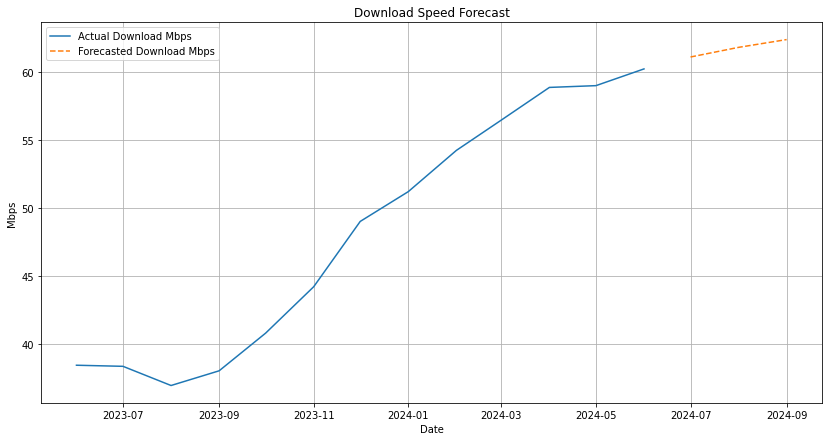

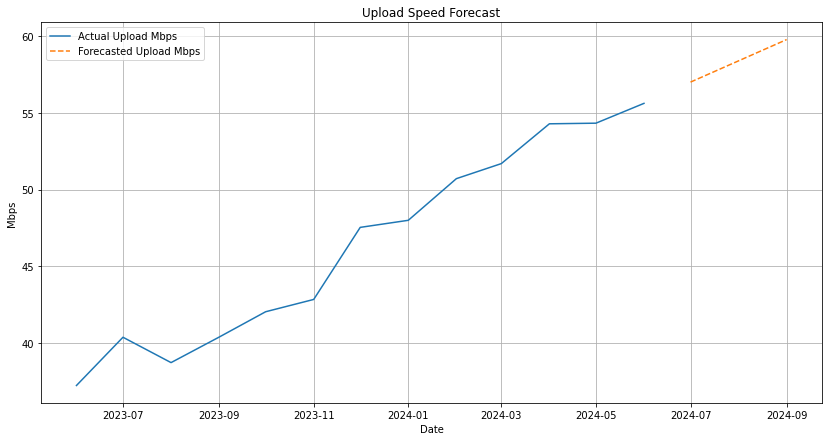

In [51]:
forecast_dates = pd.date_range(start=df['global_index_date'].iloc[-1], periods=4, freq='MS')[1:]

plt.figure(figsize=(14, 7))
plt.plot(df['global_index_date'], df['download_mbps'], label='Actual Download Mbps')
plt.plot(forecast_dates, forecast_download, label='Forecasted Download Mbps', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mbps')
plt.title('Download Speed Forecast')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['global_index_date'], df['upload_mbps'], label='Actual Upload Mbps')
plt.plot(forecast_dates, forecast_upload, label='Forecasted Upload Mbps', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Mbps')
plt.title('Upload Speed Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
data = cis_data["azerbaijan"]
df_fixed_mean = pd.DataFrame(data['fixedMean'])
df_mobile_mean = pd.DataFrame(data['mobileMean'])
df_fixed_median = pd.DataFrame(data['fixedMedian'])
df_mobile_median = pd.DataFrame(data['mobileMedian'])
# Convert date to datetime and other columns to numeric
for df in [df_fixed_mean, df_mobile_mean, df_fixed_median, df_mobile_median]:
    df['date'] = pd.to_datetime(df['date'], unit='ms')
    for col in ['download_mbps', 'upload_mbps', 'latency_ms', 'rank']:
        df[col] = pd.to_numeric(df[col])


# for col in ['download_mbps', 'upload_mbps', 'latency_ms', 'rank']:
#     df[col] = pd.to_numeric(pd.DataFrame(df)[col])
# # Set the 'month' column as the index and convert it to datetime
df_fixed_mean['month'] = pd.to_datetime(df_fixed_mean['month'])
df_fixed_mean.set_index('month', inplace=True)

df_mobile_mean['month'] = pd.to_datetime(df_mobile_mean['month'])
df_mobile_mean.set_index('month', inplace=True)

# fixed_mean_df, mobile_mean_df

In [56]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Function to fit the exponential smoothing model
def fit_and_forecast(series, periods=12):
    model = ExponentialSmoothing(series, trend='add', seasonal=None, seasonal_periods=12)
    fit = model.fit()
    forecast = fit.forecast(periods)

    # Calculate confidence intervals with increasing uncertainty
    residuals = fit.resid
    rmse = np.sqrt(np.mean(residuals**2))
    ci_multiplier = 1.96  # for 95% confidence interval
    
    # Create an array of increasing factors
    increasing_factor = np.linspace(1, 2, periods)  # Adjust the range (1 to 2) as needed
    
    lower_ci = forecast - ci_multiplier * rmse * increasing_factor
    upper_ci = forecast + ci_multiplier * rmse * increasing_factor
    
    forecast_ci = pd.DataFrame({'lower': lower_ci, 'upper': upper_ci}, index=forecast.index)
    
    return fit, forecast, forecast_ci

# Fit the exponential smoothing model for each indicator
results_fixed = {}
results_mobile = {}
for column in df_fixed_mean.columns:
    fit, forecast, forecast_ci = fit_and_forecast(df_fixed_mean[column])
    results_fixed[column] = {'fit': fit, 'forecast': forecast, 'forecast_ci': forecast_ci}

for column in df_mobile_mean.columns:
    fit, forecast, forecast_ci = fit_and_forecast(df_mobile_mean[column])
    results_mobile[column] = {'fit': fit, 'forecast': forecast, 'forecast_ci': forecast_ci}

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [41]:
# !jupyter nbconvert --no-input --to pdf --allow-chromium-download scrap.ipynb

In [52]:
import json
import subprocess

def modify_notebook_metadata(notebook_path, title, author):
    with open(notebook_path, 'r', encoding='utf-8') as f:
        notebook_content = json.load(f)
    
    notebook_content['metadata']['title'] = title
    notebook_content['metadata']['authors'] = [{'name': author}]
    
    with open(notebook_path, 'w', encoding='utf-8') as f:
        json.dump(notebook_content, f, indent=2)

def convert_notebook_to_pdf(notebook_path, output_name):
    try:
        subprocess.run([
            "jupyter", "nbconvert",
            "--no-input",
            "--to", "pdf",
            "--output", output_name,
            notebook_path
        ], check=True)
        print(f"Successfully converted {notebook_path} to {output_name}.pdf.")
    except subprocess.CalledProcessError as e:
        print(f"Error occurred while converting {notebook_path} to PDF: {e}")

# Example usage
notebook_path = "./scrap.ipynb"
title = "MB Ölkələrinin 2023-2024-cü İllər Üzrə İnternet Göstəricilərinin Təhlili"
author = "Samir Orucov"
output_name = "CIS_mean_median"


In [53]:
modify_notebook_metadata(notebook_path, title, author)


In [54]:
convert_notebook_to_pdf(notebook_path, output_name)

Successfully converted ./scrap.ipynb to CIS_mean_median.pdf.


In [44]:
# def flatten_data(data):
#     flattened_data = []
#     for country, metrics in data.items():
#         for metric_type, records in metrics.items():
#             if isinstance(records, (list, dict)):  # Check if records is iterable
#                 for record in records:
#                     flattened_record = record.copy() if isinstance(record, dict) else {'value': record}
#                     flattened_record['country'] = country
#                     flattened_record['metric_type'] = metric_type
#                     flattened_data.append(flattened_record)
#             else:
#                 # If records is not iterable, create a single record
#                 flattened_record = {'value': records, 'country': country, 'metric_type': metric_type}
#                 flattened_data.append(flattened_record)
#     return flattened_data

# flattened_data = flatten_data(cis_data)
# df = pd.DataFrame(flattened_data)


# # Convert the date columns to readable formats
# df['global_index_date'] = pd.to_datetime(df['global_index_date'])
# df['aggregate_date'] = pd.to_datetime(df['aggregate_date'])
# df['date'] = pd.to_datetime(df['date'], unit='ms')

# # Save to CSV
# df.to_csv('cis_data.csv', index=False)

In [45]:
# df

In [46]:
# Step 2: Delete the "currentMonth" key for all countries
# for country in cis_data:
#     if "currentMonth" in cis_data[country]:
#         del cis_data[country]["currentMonth"]

In [41]:
# cis_dataimport pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.structural import UnobservedComponents

def forecast_arima_with_break(df, column, break_date, steps=12):
    # Convert break_date to datetime if it's not already
    break_date = pd.to_datetime(break_date)
    
    # Split the data into two parts
    df_before = df[df['global_index_date'] < break_date]
    df_after = df[df['global_index_date'] >= break_date]
    
    # Fit ARIMA model to the data before the break
    model_before = ARIMA(df_before[column], order=(1, 1, 1), trend="t")
    model_fit_before = model_before.fit()
    
    # Fit ARIMA model to the data after the break
    model_after = ARIMA(df_after[column], order=(1, 1, 1), trend="t")
    model_fit_after = model_after.fit()
    
    # Use the model after the break for forecasting
    forecast = model_fit_after.forecast(steps=steps)
    stderr = model_fit_after.bse
    conf_int = model_fit_after.get_forecast(steps=steps).conf_int(alpha=0.05)
    
    return forecast, stderr, conf_int

# Specify the break date (August 1, 2023 in this example)
break_date = '2024-08-01'

# Forecast for each type
forecasts = {}
for name, df in zip(['fixed_mean', 'fixed_median', 'mobile_mean', 'mobile_median'],
                    [fixed_mean_df, fixed_median_df, mobile_mean_df, mobile_median_df]):
    forecasts[name] = {}
    for column in ['download_mbps', 'upload_mbps']:
        forecasts[name][column] = forecast_arima_with_break(df, column, break_date)

# Example output
print(forecasts['fixed_mean']['download_mbps'])

C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\samir\App

(1     67.77
2     67.77
3     67.77
4     67.77
5     67.77
6     67.77
7     67.77
8     67.77
9     67.77
10    67.77
11    67.77
12    67.77
Name: predicted_mean, dtype: float64, const    NaN
ar.L1    NaN
ma.L1    NaN
sigma2   NaN
dtype: float64,     lower download_mbps  upper download_mbps
1             65.810036            69.729964
2             64.998192            70.541808
3             64.375243            71.164757
4             63.850072            71.689928
5             63.387387            72.152613
6             62.969088            72.570912
7             62.584423            72.955577
8             62.226385            73.313615
9             61.890108            73.649892
10            61.572050            73.967950
11            61.269535            74.270465
12            60.980486            74.559514)


C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\samir\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\samir\App